In [35]:
import torch 
from torchvision.models.feature_extraction import (
    create_feature_extractor,
    get_graph_node_names,
)
import sys
sys.path.append("/Users/tizianocausin/Desktop/backUp20240609/summer2025/ponce_lab/exp_set/python_scripts/src/")
from alignment.utils import get_maxpool_evecs
from dim_redu_anns.utils import get_layer_out_shape
from torchvision import transforms, datasets, models
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

In [38]:
model_name = ["alexnet", "resnet18"]
layer_names = ['classifier.5', "avgpool"]
device = "cpu"
model_cls = [getattr(models, mn) for mn in model_name]
model = [mc(pretrained=True).to(device).eval() for mc in model_cls]
feature_extractors = [create_feature_extractor(
    m, return_nodes=[l_n]
).to(device) for l_n, m in zip(layer_names, model)]


/Users/tizianocausin/Desktop/virtual_envs/ponce_env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/tizianocausin/Desktop/virtual_envs/ponce_env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/tizianocausin/Desktop/virtual_envs/ponce_env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `wei

In [45]:
layer_shapes = [get_layer_out_shape(feature_extractors[i], layer_names[i]) for i in range(2)]

In [46]:
layer_shapes

[torch.Size([4096]), torch.Size([512, 1, 1])]

In [87]:
path2files = [f"/Users/tizianocausin/Library/CloudStorage/OneDrive-SISSA/data_repo/exp_set_res/silico/imagenet_val_{mn}_{l_n}_pca_model_1000_PCs.pkl" for l_n, mn in zip(layer_names, model_name)]
data = [joblib.load(p2f) for p2f in path2files]

In [90]:
data[0].mean_

array([0.30316114, 0.27147235, 0.33300008, ..., 0.33619015, 0.31635085,
       0.31840618], shape=(4096,))

In [91]:
data[0].n_features_in_

4096

In [84]:
maxpool_evecs = [d.components_ for d in data]

In [85]:
#maxpool_evecs = [get_maxpool_evecs(data[i], layer_names[i], layer_shapes[i]) for i in range(2)]
#del evecs

In [86]:
for ev in maxpool_evecs:
    print(ev.shape) 

(1000, 4096)
(512, 512)


In [8]:
print(maxpool_evecs[1].shape)

(1000, 4096)


In [92]:
tot_dims = min(maxpool_evecs[0].shape[0], maxpool_evecs[1].shape[0])
maxpool_evecs = [mp[:tot_dims,:] for mp in maxpool_evecs]

In [93]:
canonical_correlations = np.array([np.corrcoef(d1_cca[:, i], d2_cca[:, i])[0, 1] for i in range(d1_cca.shape[1])])
print("Canonical Correlations:", canonical_correlations)


Canonical Correlations: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [95]:
# TODO work with CCA now
cca = CCA(n_components = 500)
d1_cca, d2_cca = cca.fit_transform(maxpool_evecs[0], maxpool_evecs[1])

/Users/tizianocausin/Desktop/virtual_envs/ponce_env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/tizianocausin/Desktop/virtual_envs/ponce_env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3064: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


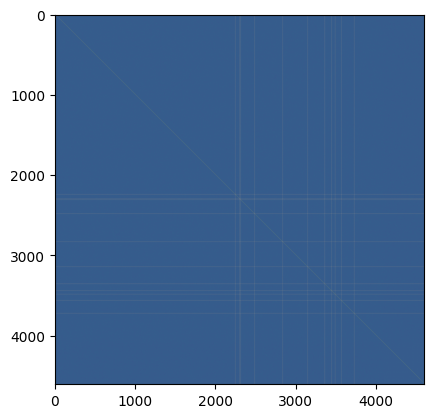

In [74]:
plt.imshow(np.corrcoef(maxpool_evecs[0].T,maxpool_evecs[1][:tot_dims, :tot_dims].T))

In [75]:
maxpool_evecs[1].shape

(512, 512)

In [76]:
print(cca.x_weights_)

[[-0.01347625  0.02477033 -0.01511973 ...  0.02939349 -0.0002994
  -0.01724902]
 [ 0.02213134 -0.02115681 -0.0007094  ... -0.01497219 -0.00432475
  -0.02126016]
 [ 0.0028166   0.00316328  0.00463241 ... -0.00222396  0.0088382
  -0.00464526]
 ...
 [-0.00654067  0.01374151  0.00142295 ...  0.01864445  0.00700699
  -0.01415452]
 [ 0.0079154   0.0024948  -0.00176432 ...  0.01429447  0.0169932
   0.02599079]
 [-0.00078032 -0.0432504   0.00519383 ...  0.02648156 -0.01316879
  -0.00267993]]


In [77]:
a = np.corrcoef(d1_cca.T, d2_cca.T)#[0,1]

(512, 500) (512, 500)
(512, 512)
[[ 9.99872623e-01 -1.03837711e-02  6.57205135e-03 ... -2.92968708e-02
   2.57314706e-02 -1.85056765e-02]
 [-1.04456602e-02  9.99904401e-01  5.24828781e-03 ...  2.98503206e-03
  -5.97032456e-03 -3.46417450e-03]
 [ 6.69877704e-03  5.24644724e-03  9.99919830e-01 ...  7.05097667e-03
  -4.36119703e-03  4.53385945e-03]
 ...
 [-2.93152405e-02  2.98487913e-03  6.99028714e-03 ...  9.99897135e-01
   1.12823797e-02  2.80665527e-04]
 [ 2.58888556e-02 -5.96568760e-03 -4.38843878e-03 ...  1.13021185e-02
   9.99907485e-01 -2.52300403e-03]
 [-1.86324669e-02 -3.46705754e-03  4.56541567e-03 ...  2.77914299e-04
  -2.51286604e-03  9.99908913e-01]]


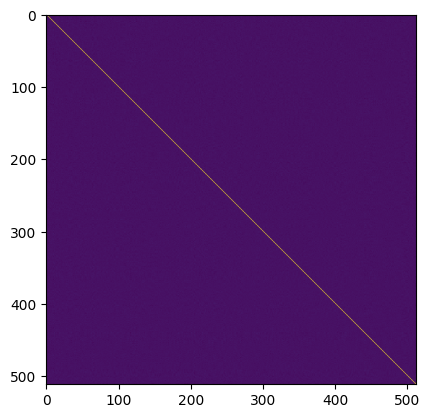

In [78]:
b = np.corrcoef(d1_cca, d2_cca)[0:d1_cca.shape[0], d1_cca.shape[0]:]
print(d1_cca.shape, d2_cca.shape)
print(b.shape)
plt.imshow(b)
print(b)

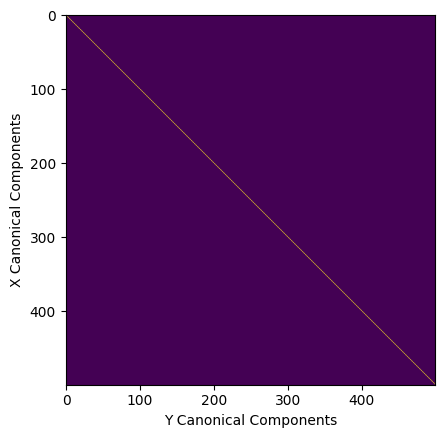

In [79]:
corr_mat = np.corrcoef(d1_cca.T, d2_cca.T)[0:d1_cca.shape[1], d1_cca.shape[1]:]
plt.imshow(corr_mat)#, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.xlabel("Y Canonical Components")
plt.ylabel("X Canonical Components")
plt.show()

In [80]:
print(corr_mat)

[[ 1.00000000e+00 -1.54241142e-15 -7.52744782e-16 ...  2.97099888e-16
  -1.69809360e-16 -1.59340333e-16]
 [ 1.65216888e-15  1.00000000e+00  8.43631323e-18 ... -4.42559597e-17
  -1.53303008e-16 -1.96089080e-16]
 [-7.10489067e-16 -4.25345987e-16  1.00000000e+00 ... -4.95421634e-17
   2.78638459e-16 -2.86710369e-16]
 ...
 [ 4.55739091e-17  5.90775620e-16 -2.78996720e-17 ...  1.00000000e+00
   2.45748548e-16  1.37389471e-16]
 [-1.15261752e-16 -8.06065343e-17 -1.34910165e-16 ... -1.29227721e-16
   1.00000000e+00 -3.34116680e-16]
 [ 2.62189060e-17 -1.55936165e-16 -2.39394259e-16 ... -2.33227329e-16
  -1.80498074e-16  1.00000000e+00]]


<BarContainer object of 500 artists>

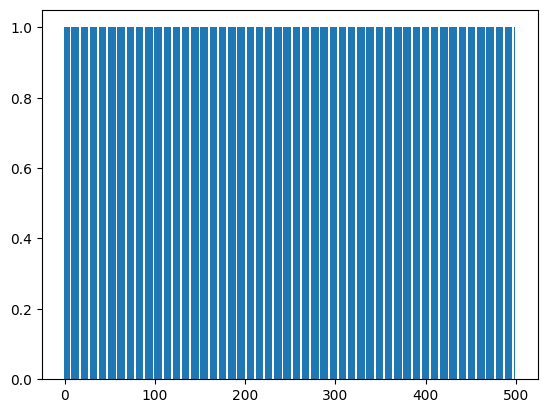

In [81]:
plt.bar( range(corr_mat.shape[0]),np.diag(corr_mat))